# Подготовка исходного датасета

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

data = pd.read_csv('data.csv')
display(data.head(10))

,Title,Political Lean,Score,Id,Subreddit,URL,Num of Comments,Text,Date Created
0,"No matter who someone is, how they look like, ...",Liberal,1,t5fybt,socialism,https://v.redd.it/ng5fyl7hp2l81,0,NaN,1.646272e+09
1,Biden speech draws 38.2 million U.S. TV viewers,Liberal,6,t5fqdn,democrats,https://www.reuters.com/world/us/biden-speech-...,1,NaN,1.646271e+09
2,State of the union,Liberal,1,t5fj9a,DemocraticSocialism,https://www.reddit.com/r/DemocraticSocialism/c...,1,Who watched the state of the union last night ...,1.646270e+09
3,We Should Just Give Poor People Money,Liberal,7,t5f7n9,SocialDemocracy,https://youtu.be/a80kRjpubG0,3,NaN,1.646270e+09
4,Do it for the Dew,Liberal,6,t5es2c,democrats,https://i.redd.it/drmunn90f2l81.jpg,1,NaN,1.646268e+09
5,Proposed Bill Would Allow Kids With Contagious...,Liberal,3,t5eqc6,progressive,https://www.newson6.com/story/621f8983241e3107...,5,NaN,1.646268e+09
6,3 House Republicans voted against a bipartisan...,Liberal,11,t5eqa1,democrats,https://www.businessinsider.com/3-house-republ...,4,NaN,1.646268e+09
7,"If you're bombing civilian targets, you're the...",Liberal,0,t5epal,alltheleft,https://i.redd.it/hjysdukbe2l81.png,2,NaN,1.646268e+09
8,Every city have to government their resources ...,Liberal,0,t5ejvw,socialism,https://www.reddit.com/r/socialism/comments/t5...,2,NaN,1.646267e+09
9,Workers Behind First Union Push at an Amazon R...,Liberal,19,t5egv1,socialism,https://www.businessinsider.com/workers-first-...,0,NaN,1.646267e+09


In [12]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12854 entries, 0 to 12853
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Title            12854 non-null  object 
 1   Political Lean   12854 non-null  object 
 2   Score            12854 non-null  int64  
 3   Id               12854 non-null  object 
 4   Subreddit        12854 non-null  object 
 5   URL              12854 non-null  object 
 6   Num of Comments  12854 non-null  int64  
 7   Text             2428 non-null   object 
 8   Date Created     12854 non-null  float64
dtypes: float64(1), int64(2), object(6)
memory usage: 903.9+ KB
None


In [14]:
print(data.isna().values.any())
print(data.columns[data.isna().any()].tolist())
print(data['Political Lean'].unique())

True
['Text']
['Liberal' 'Conservative']


In [16]:
data['Political Lean'] = data['Political Lean'].apply(lambda x: 1 if x=='Liberal' else 0)
display(data.head(10))

,Title,Political Lean,Score,Id,Subreddit,URL,Num of Comments,Text,Date Created
0,"No matter who someone is, how they look like, ...",1,1,t5fybt,socialism,https://v.redd.it/ng5fyl7hp2l81,0,NaN,1.646272e+09
1,Biden speech draws 38.2 million U.S. TV viewers,1,6,t5fqdn,democrats,https://www.reuters.com/world/us/biden-speech-...,1,NaN,1.646271e+09
2,State of the union,1,1,t5fj9a,DemocraticSocialism,https://www.reddit.com/r/DemocraticSocialism/c...,1,Who watched the state of the union last night ...,1.646270e+09
3,We Should Just Give Poor People Money,1,7,t5f7n9,SocialDemocracy,https://youtu.be/a80kRjpubG0,3,NaN,1.646270e+09
4,Do it for the Dew,1,6,t5es2c,democrats,https://i.redd.it/drmunn90f2l81.jpg,1,NaN,1.646268e+09
5,Proposed Bill Would Allow Kids With Contagious...,1,3,t5eqc6,progressive,https://www.newson6.com/story/621f8983241e3107...,5,NaN,1.646268e+09
6,3 House Republicans voted against a bipartisan...,1,11,t5eqa1,democrats,https://www.businessinsider.com/3-house-republ...,4,NaN,1.646268e+09
7,"If you're bombing civilian targets, you're the...",1,0,t5epal,alltheleft,https://i.redd.it/hjysdukbe2l81.png,2,NaN,1.646268e+09
8,Every city have to government their resources ...,1,0,t5ejvw,socialism,https://www.reddit.com/r/socialism/comments/t5...,2,NaN,1.646267e+09
9,Workers Behind First Union Push at an Amazon R...,1,19,t5egv1,socialism,https://www.businessinsider.com/workers-first-...,0,NaN,1.646267e+09


In [18]:
print(data['Political Lean'].value_counts())

Political Lean
1    8319
0    4535
Name: count, dtype: int64


In [20]:
from sklearn.model_selection import train_test_split
X=data['Title'].tolist()
y=data['Political Lean'].tolist()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Преобразование текста в вектора с помощью Transformer

In [23]:
import torch
from sentence_transformers import SentenceTransformer
model_name = 'sentence-transformers/paraphrase-multilingual-MiniLM-L12-v2'
try:
    embedding_model = SentenceTransformer(model_name)
    print(f"Модель Transformer {model_name} успешно загружена")
except Exception as e:
    print(f"Ошибка загрузки модели Transformer: {e}")

Модель Transformer sentence-transformers/paraphrase-multilingual-MiniLM-L12-v2 успешно загружена


In [27]:
X_train_vectors = embedding_model.encode(X_train, convert_to_numpy=True)
X_test_vectors = embedding_model.encode(X_test, convert_to_numpy=True)
print(f"\nРазмерность полученных эмбеддингов: {X_train_vectors.shape[1]}")


Размерность полученных эмбеддингов: 384


# Обучение и сравнение моделей

In [30]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
def evaluate_model(model_name, y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    print(f"\nРезультаты для {model_name}")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-score: {f1:.4f}")
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(4, 3))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
               xticklabels=['Консерватор', 'Либерал'],
               yticklabels=['Консерватор', 'Либерал'])
    plt.title(f"Матрица ошибок для {model_name}")
    plt.ylabel("Истинный класс")
    plt.xlabel("Предсказанный класс")
    plt.show()
    return {'accuracy': accuracy, 'precision': precision, 'recall': recall, 'f1': f1}
results = {}

## Логистическая регрессия


Результаты для Логистическая регрессия
Accuracy: 0.7246
Precision: 0.7521
Recall: 0.8570
F1-score: 0.8011


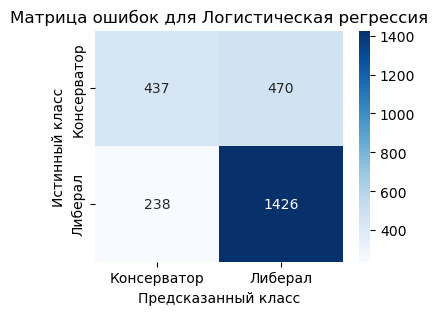

In [33]:
from sklearn.linear_model import LogisticRegression
log_reg_model = LogisticRegression(max_iter=1000, random_state=42)
log_reg_model.fit(X_train_vectors, y_train)
y_pred_log_reg = log_reg_model.predict(X_test_vectors)
results['Logistic Regression'] = evaluate_model("Логистическая регрессия", y_test, y_pred_log_reg)

## XGBoost

C:\Users\user\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [13:17:41] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



Результаты для XGBoost
Accuracy: 0.7441
Precision: 0.7673
Recall: 0.8678
F1-score: 0.8144


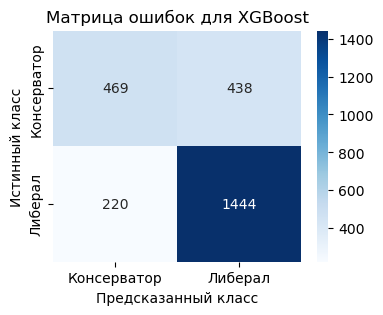

In [36]:
import xgboost as xgb
xgb_model = xgb.XGBClassifier(objective='binary:logistic', eval_metric='logloss', use_label_encoder=False, random_state=42)
xgb_model.fit(X_train_vectors, y_train)
y_pred_xgb = xgb_model.predict(X_test_vectors)
results['XGBoost'] = evaluate_model("XGBoost", y_test, y_pred_xgb)

## Перцептрон (MLP)


Результаты для Перцептрон (MLP)
Accuracy: 0.7437
Precision: 0.7735
Recall: 0.8540
F1-score: 0.8118


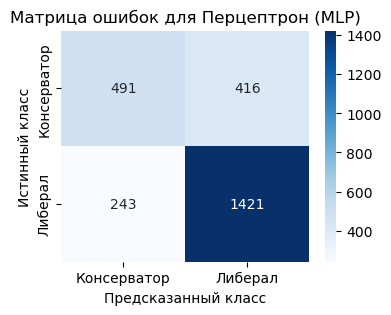

In [39]:
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

X_train_tensor = torch.tensor(X_train_vectors, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).unsqueeze(1)
X_test_tensor = torch.tensor(X_test_vectors, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32).unsqueeze(1)

train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

batch_size=64
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

class MLP(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(MLP,self).__init__()
        self.fc1=nn.Linear(input_dim, hidden_dim)
        self.relu=nn.ReLU()
        self.fc2=nn.Linear(hidden_dim, output_dim)
        self.sigmoid=nn.Sigmoid()
    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        x = self.sigmoid(x)
        return x

input_dim = X_train_vectors.shape[1]
hidden_dim = 128
output_dim = 1

mlp_model = MLP(input_dim, hidden_dim, output_dim)
criterion = nn.BCELoss()
optimizer = optim.Adam(mlp_model.parameters(), lr=0.001)

num_epochs = 10
for epoch in range(num_epochs):
    mlp_model.train()
    for inputs, labels in train_loader:
        optimizer.zero_grad()
        outputs = mlp_model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

mlp_model.eval()
y_pred_mlp_list = []
with torch.no_grad():
    for inputs,_ in test_loader:
        outputs = mlp_model(inputs)
        predicted = (outputs>0.5).int()
        y_pred_mlp_list.extend(predicted.squeeze().tolist())
results['Perceptron'] = evaluate_model("Перцептрон (MLP)", y_test, y_pred_mlp_list)

## Сверточная сеть (CNN)


Результаты для Сверточная сеть (CNN)
Accuracy: 0.7417
Precision: 0.7904
Recall: 0.8179
F1-score: 0.8039


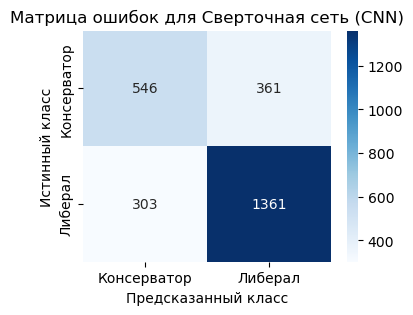

In [42]:
class TextCNN(nn.Module):
    def __init__(self, input_dim, num_filters, kernel_size, output_dim):
        super(TextCNN, self).__init__()
        self.conv = nn.Conv1d(in_channels=input_dim, out_channels=num_filters, kernel_size=kernel_size)
        self.relu = nn.ReLU()
        self.pool = nn.AdaptiveMaxPool1d(1)
        self.fc = nn.Linear(num_filters, output_dim)
        self.sigmoid = nn.Sigmoid()
    def forward(self, x):
        x = x.unsqueeze(2)
        x = self.conv(x)
        x = self.relu(x)
        x = self.pool(x).squeeze(2)
        x = self.fc(x)
        x = self.sigmoid(x)
        return x

input_dim = X_train_vectors.shape[1]
num_filters = 128
kernel_size = 1
output_dim = 1

cnn_model = TextCNN(input_dim, num_filters, kernel_size, output_dim)
criterion_cnn = nn.BCELoss()
optimizer_cnn = optim.Adam(cnn_model.parameters(), lr=0.001)

num_epochs_cnn = 10
for epoch in range(num_epochs_cnn):
    cnn_model.train()
    for inputs, labels in train_loader:
        optimizer_cnn.zero_grad()
        outputs = cnn_model(inputs)
        loss = criterion_cnn(outputs, labels)
        loss.backward()
        optimizer_cnn.step()

cnn_model.eval()
y_pred_cnn_list = []
with torch.no_grad():
    for inputs,_ in test_loader:
        outputs = cnn_model(inputs)
        predicted = (outputs>0.5).int()
        y_pred_cnn_list.extend(predicted.squeeze().tolist())
results['CNN'] = evaluate_model("Сверточная сеть (CNN)", y_test, y_pred_cnn_list)

## Рекуррентная сеть (LSTM)


Результаты для Рекуррентная сеть (LSTM)
Accuracy: 0.7410
Precision: 0.7781
Recall: 0.8389
F1-score: 0.8074


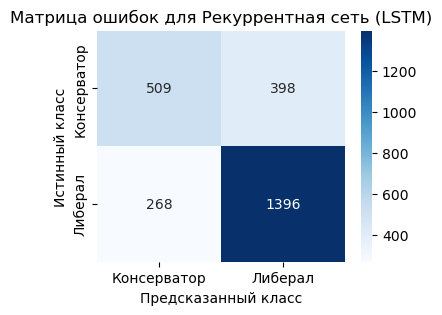

In [45]:
class TextLSTM(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(TextLSTM, self).__init__()
        self.lstm = nn.LSTM(input_dim, hidden_dim, batch_first=True)
        self.fc = nn.Linear(hidden_dim, output_dim)
        self.sigmoid = nn.Sigmoid()
    def forward(self, x):
        x = x.unsqueeze(1)
        lstm_out, _ = self.lstm(x)
        last_hidden_state = lstm_out[:, -1, :]
        x = self.fc(last_hidden_state)
        x = self.sigmoid(x)
        return x

input_dim = X_train_vectors.shape[1]
hidden_dim_lstm = 128
output_dim = 1

lstm_model = TextLSTM(input_dim, hidden_dim_lstm, output_dim)
criterion_lstm = nn.BCELoss()
optimizer_lstm = optim.Adam(lstm_model.parameters(), lr=0.001)

num_epochs_lstm = 10
for epoch in range(num_epochs_lstm):
    lstm_model.train()
    for inputs, labels in train_loader:
        optimizer_lstm.zero_grad()
        outputs = lstm_model(inputs)
        loss = criterion_lstm(outputs, labels)
        loss.backward()
        optimizer_lstm.step()

lstm_model.eval()
y_pred_lstm_list = []
with torch.no_grad():
    for inputs,_ in test_loader:
        outputs = lstm_model(inputs)
        predicted = (outputs>0.5).int()
        y_pred_lstm_list.extend(predicted.squeeze().tolist())
results['LSTM'] = evaluate_model("Рекуррентная сеть (LSTM)", y_test, y_pred_lstm_list)

# Результаты моделей, сравнение


----Сводная таблица результатов----
Модель                   Accuracy  Precision Recall    F1-Score  
------------------------------------------------------------
Logistic Regression       0.7246 0.7521 0.8570 0.8011
XGBoost                   0.7441 0.7673 0.8678 0.8144
Perceptron                0.7437 0.7735 0.8540 0.8118
CNN                       0.7417 0.7904 0.8179 0.8039
LSTM                      0.7410 0.7781 0.8389 0.8074


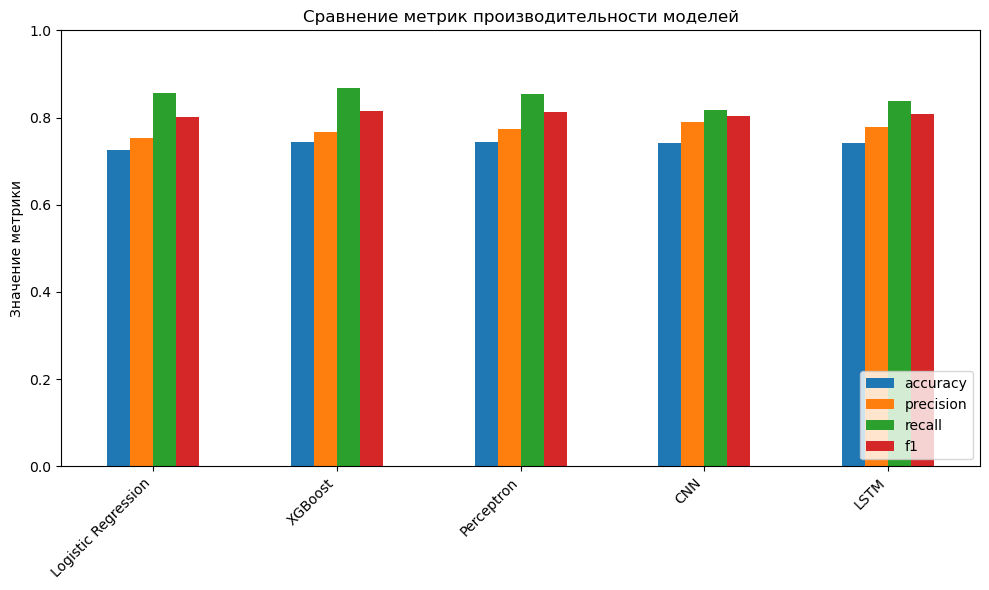

In [48]:
print("\n----Сводная таблица результатов----")
print(f"{'Модель':<25}{'Accuracy':<10}{'Precision':<10}{'Recall':<10}{'F1-Score':<10}")
print("-"*60)
for model_name, metrics in results.items():
    print(f"{model_name:<25} {metrics['accuracy']:.4f} {metrics['precision']:.4f} {metrics['recall']:.4f} {metrics['f1']:.4f}")
metrics_df = pd.DataFrame(results).T
metrics_df.plot(kind='bar', figsize=(10, 6))
plt.title('Сравнение метрик производительности моделей')
plt.ylabel('Значение метрики')
plt.ylim(0, 1)
plt.xticks(rotation=45, ha='right')
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()

In [ ]:
!conda install -c conda-forge pandoc